<a href="https://colab.research.google.com/github/guilhermelaviola/IntegrativePracticeInDataScience/blob/main/Class12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Intelligence**
Business intelligence (BI) encompasses techniques and processes that help organizations collect, analyze, and share data, ultimately aiding senior management in decision-making. The BI lifecycle begins with defining information needs, followed by data collection, cleaning, analysis, and dissemination through reports and dashboards. A key element is the Data Warehouse, which centralizes historical data for analysis, supported by ETL (Extract, Transform, Load) tools for data integration. BI benefits organizations of all sizes, enhancing process optimization and strategic decision-making. As data analysis becomes critical in competitive markets, BI tools evolve with technologies like AI and machine learning, fostering a real-time view of business performance and democratizing access to data. Consequently, BI is not just a technological investment; it necessitates a cultural shift towards data-driven decision-making throughout the organization.

In [1]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Sample Data**

In [3]:
# Generating example sales data:
sales = pd.DataFrame({
    'date': pd.date_range(start='2025-01-01', periods=20, freq='D'),
    'product_id': np.random.choice([101, 102, 103], size=20),
    'quantity': np.random.randint(1, 10, size=20),
    'price': np.random.randint(10, 100, size=20)
})

# Generating example product data:
products = pd.DataFrame({
    'product_id': [101, 102, 103],
    'product_name': ['Laptop', 'Keyboard', 'Mouse'],
    'category': ['Electronics', 'Peripherals', 'Peripherals']
})

sales.head(), products

(        date  product_id  quantity  price
 0 2025-01-01         101         8     24
 1 2025-01-02         101         3     51
 2 2025-01-03         101         6     30
 3 2025-01-04         102         4     46
 4 2025-01-05         103         9     60,
    product_id product_name     category
 0         101       Laptop  Electronics
 1         102     Keyboard  Peripherals
 2         103        Mouse  Peripherals)

## **Data Integration (ETL)**

In [4]:
# Converting dates:
sales['date'] = pd.to_datetime(sales['date'])

# Removing negative quantities (bad data):
sales = sales[sales['quantity'] > 0]

# Adding a new column:
sales['total_value'] = sales['quantity'] * sales['price']

# Joining with product table:
dw_sales = sales.merge(products, on='product_id', how='left')
dw_sales.head()

,date,product_id,quantity,price,total_value,product_name,category
0,2025-01-01,101,8,24,192,Laptop,Electronics
1,2025-01-02,101,3,51,153,Laptop,Electronics
2,2025-01-03,101,6,30,180,Laptop,Electronics
3,2025-01-04,102,4,46,184,Keyboard,Peripherals
4,2025-01-05,103,9,60,540,Mouse,Peripherals


## **Analysis with Business Intelligence**

In [6]:
dw_sales['month'] = dw_sales['date'].dt.to_period('M')

# KPI: Monthly revenue per product category.
monthly_revenue = (
    dw_sales.groupby(['month', 'category'])['total_value']
    .sum()
    .reset_index()
    .sort_values(['month', 'total_value'], ascending=[True, False])
)

monthly_revenue

,month,category,total_value
1,2025-01,Peripherals,3061
0,2025-01,Electronics,1687


## **Reporting/Dashboard visualization**

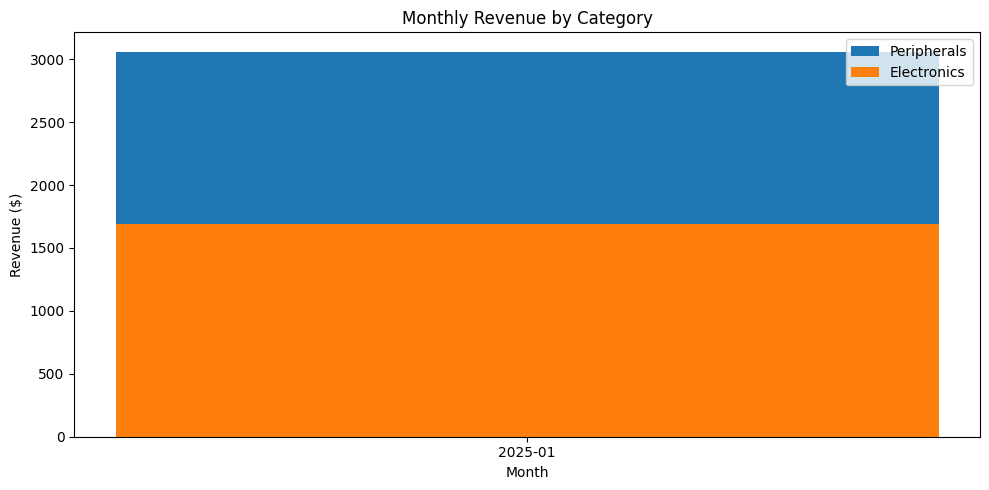

In [7]:
# Using a bar chart for management:
plt.figure(figsize=(10, 5))
for category in monthly_revenue['category'].unique():
    subset = monthly_revenue[monthly_revenue['category'] == category]
    plt.bar(subset['month'].astype(str), subset['total_value'], label=category)

plt.title('Monthly Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()
plt.tight_layout()
plt.show()